# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [209]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

## Parte 1

### _Setup_ da parte 1

In [210]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

## Inicie sua análise a partir da parte 1 a partir daqui

In [211]:
dataframe.head()


,normal,binomial
0,21.986857,18
1,19.446943,15
2,22.590754,14
3,26.092119,15
4,19.063387,21


,normal,binomial
0,21.986857,18
1,19.446943,15
2,22.590754,14
3,26.092119,15
4,19.063387,21


In [212]:
dataframe.describe()

,normal,binomial
count,10000.000000,10000.000000
mean,19.991456,20.097000
std,4.013850,4.041191
min,4.310399,6.000000
25%,17.309638,17.000000
50%,19.989620,20.000000
75%,22.684324,23.000000
max,35.704951,36.000000


,normal,binomial
count,10000.000000,10000.000000
mean,19.991456,20.097000
std,4.013850,4.041191
min,4.310399,6.000000
25%,17.309638,17.000000
50%,19.989620,20.000000
75%,22.684324,23.000000
max,35.704951,36.000000


## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [213]:
dataframe.quantile([0.25,0.5,0.75])

,normal,binomial
0.25,17.309638,17.0
0.50,19.989620,20.0
0.75,22.684324,23.0


,normal,binomial
0.25,17.309638,17.0
0.50,19.989620,20.0
0.75,22.684324,23.0


In [214]:
q_norm = dataframe['normal'].quantile([0.25,0.5,0.75])

In [215]:
q_binom = dataframe['binomial'].quantile([0.25,0.5,0.75])

In [216]:
resposta = (q_norm - q_binom).values

In [217]:
resposta = np.around(resposta, decimals=3)

In [218]:
resposta

array([ 0.31 , -0.01 , -0.316])

array([ 0.31 , -0.01 , -0.316])

In [219]:
def q1():
    return tuple(resposta)
    pass

Para refletir:

* Você esperava valores dessa magnitude?

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [220]:
media_normal = dataframe.normal.mean()

In [221]:
std_normal = dataframe.normal.std()

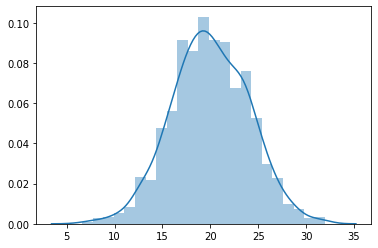

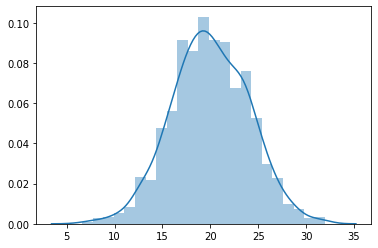

In [222]:
norm = sct.norm.rvs(loc=media_normal, scale=std_normal, size=1000) # loc é a média, scale é o desvio padrão. X ~ N(10, 9)
sns.distplot(norm)

In [223]:
ecdf = ECDF(dataframe.normal)

In [224]:
cdf_normal_1 = media_normal + std_normal

In [225]:
cdf_normal_2 = media_normal - std_normal

In [226]:
res2 = np.round(ecdf(cdf_normal_1) - ecdf(cdf_normal_2), 3)

In [227]:
res2

0.684

0.684

In [228]:
def q2():
    return float(res2)
    pass

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [229]:
m_binom = dataframe.binomial.mean()

In [230]:
v_binom = dataframe.binomial.var()

In [231]:
m_norm = dataframe.normal.mean()

In [232]:
v_norm = dataframe.normal.var()

In [233]:
dif_mv = (np.round(m_binom - m_norm, 3), np.round(v_binom - v_norm, 3))

In [234]:
def q3():
    return tuple(dif_mv)
    pass

Para refletir:

* Você esperava valore dessa magnitude?
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?

## Parte 2

### _Setup_ da parte 2

In [235]:
stars = pd.read_csv("pulsar_stars.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

In [236]:
stars.head()


,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve,target
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,False
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,False
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,False
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,False
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,False


,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve,target
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,False
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,False
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,False
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,False
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,False


In [237]:
stars.dtypes

mean_profile    float64
sd_profile      float64
kurt_profile    float64
skew_profile    float64
mean_curve      float64
sd_curve        float64
kurt_curve      float64
skew_curve      float64
target             bool
dtype: object

mean_profile    float64
sd_profile      float64
kurt_profile    float64
skew_profile    float64
mean_curve      float64
sd_curve        float64
kurt_curve      float64
skew_curve      float64
target             bool
dtype: object

In [238]:
stars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17897 entries, 0 to 17896
Data columns (total 9 columns):
mean_profile    17897 non-null float64
sd_profile      17897 non-null float64
kurt_profile    17897 non-null float64
skew_profile    17897 non-null float64
mean_curve      17897 non-null float64
sd_curve        17897 non-null float64
kurt_curve      17897 non-null float64
skew_curve      17897 non-null float64
target          17897 non-null bool
dtypes: bool(1), float64(8)
memory usage: 1.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17897 entries, 0 to 17896
Data columns (total 9 columns):
mean_profile    17897 non-null float64
sd_profile      17897 non-null float64
kurt_profile    17897 non-null float64
skew_profile    17897 non-null float64
mean_curve      17897 non-null float64
sd_curve        17897 non-null float64
kurt_curve      17897 non-null float64
skew_curve      17897 non-null float64
target          17897 non-null bool
dtypes: bool(1), float64(8)
memory usag

## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [239]:
target_false = stars[stars['target'] == 0]

In [240]:
target_false.shape

(16258, 9)

(16258, 9)

In [241]:
target_false = target_false['mean_profile']

In [242]:
false_pulsar_mean_profile_standardized = (target_false - target_false.mean()) / target_false.std()

In [243]:
quantis4 = [0.80, 0.90, 0.95]

In [244]:
arraypff = []

In [245]:
for x in quantis4:
    pff = sct.norm.ppf(x, loc=false_pulsar_mean_profile_standardized.mean(), scale=false_pulsar_mean_profile_standardized.std())
    arraypff.append(pff)

In [246]:
arraypff

[0.8416212335729144, 1.2815515655446004, 1.6448536269514722]

[0.8416212335729144, 1.2815515655446004, 1.6448536269514722]

In [247]:
arrayres4 = []

In [248]:
ecdf = ECDF(false_pulsar_mean_profile_standardized)

In [249]:
for y in arraypff:
    cdf_pff_unico = ecdf(y)
    cdf_pff_unico = cdf_pff_unico.round(3)
    arrayres4.append(cdf_pff_unico)

In [250]:
tuple(arrayres4)

(0.806, 0.911, 0.959)

(0.806, 0.911, 0.959)

In [251]:
def q4():
    return tuple(arrayres4)
    pass

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [262]:
q_star_standard = false_pulsar_mean_profile_standardized.quantile([0.25,0.5,0.75]).to_numpy()

In [263]:
q_star_standard[0]

-0.647153176628595

-0.647153176628595

In [264]:
quantis_dn = [0.25,0.5,0.75]

In [265]:
q_normal_distribution = []

In [266]:
for x in quantis_dn:
    quanti_norm = sct.norm.ppf(x, loc=0, scale=1)
    q_normal_distribution.append(quanti_norm)

In [267]:
q_normal_distribution

[-0.6744897501960817, 0.0, 0.6744897501960817]

[-0.6744897501960817, 0.0, 0.6744897501960817]

In [258]:
res5 = (round(q_star_standard[0] - q_normal_distribution[0], 3), round(q_star_standard[1] - q_normal_distribution[1], 3), round(q_star_standard[2] - q_normal_distribution[2], 3))

In [261]:
res5

(0.027, 0.04, -0.004)

(0.027, 0.04, -0.004)

In [260]:
def q5():
    return tuple(res5)
    pass

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.